# 과적합(=오버피팅)
=특정한 특성을 학습하여 원하는 목적과 다른 내용을 학습하게 되는 것을 말한다


## 과적합이 발생했을때
- 은닉노드 탈락(Dropout, 드롭아웃)

- 조기종료 (Earlystopping)
- 스케일링
- batchnormalization(표준화)

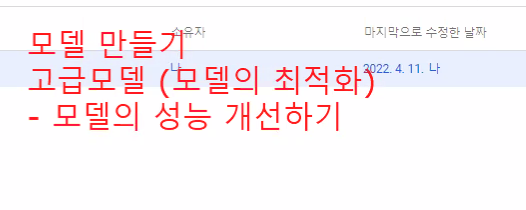

# 프로젝트 개와 고양이

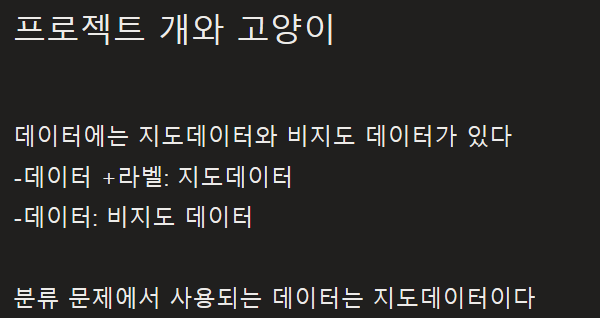

### 과적합 방지로 스케일링 진행, 추가로 이미지 데이터 증강

이미지 데이터 증강의 효과
1. 과적합의 방지
2. 이미지 갯수의 증가 -> 모델의 성능 향상


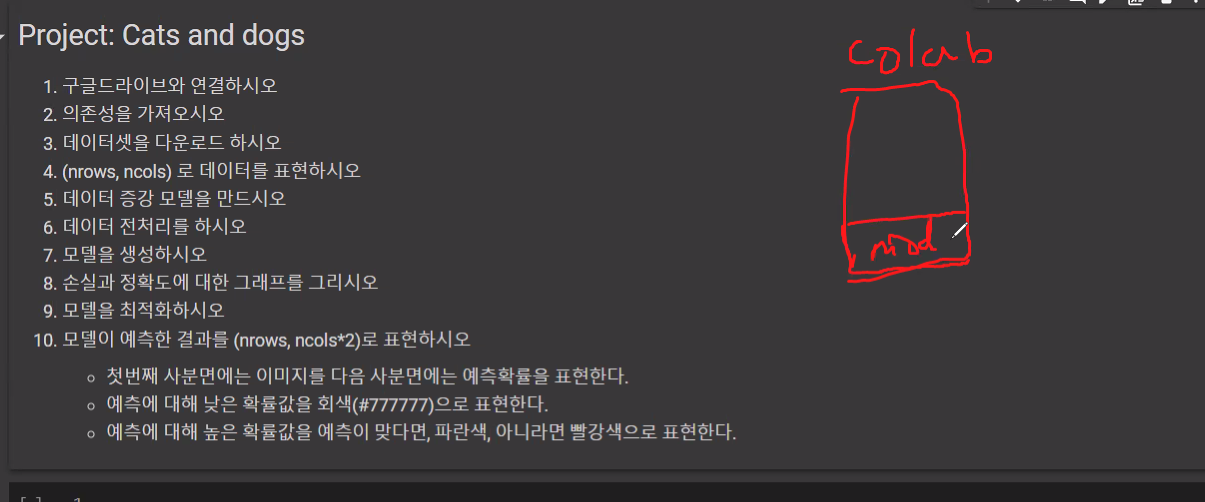

In [ ]:
#1. 구글 드라이브와 연결하시오
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
#2. 의존성을 가져오시오
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import cv2
import matplotlib.pyplot as plt


tf.__version__

'2.8.0'

In [ ]:
#3. 사용가능한 데이터셋 출력하고 데이터 셋 가져오기

tfds.list_builders()



In [ ]:
#3-2 데이터 셋 다운로드
(train_ds, val_ds, test_ds), info =tfds.load(name='cats_vs_dogs',split=['train[:60%]','train[60%:80%]','train[80%:]'],as_supervised=True,with_info=True)

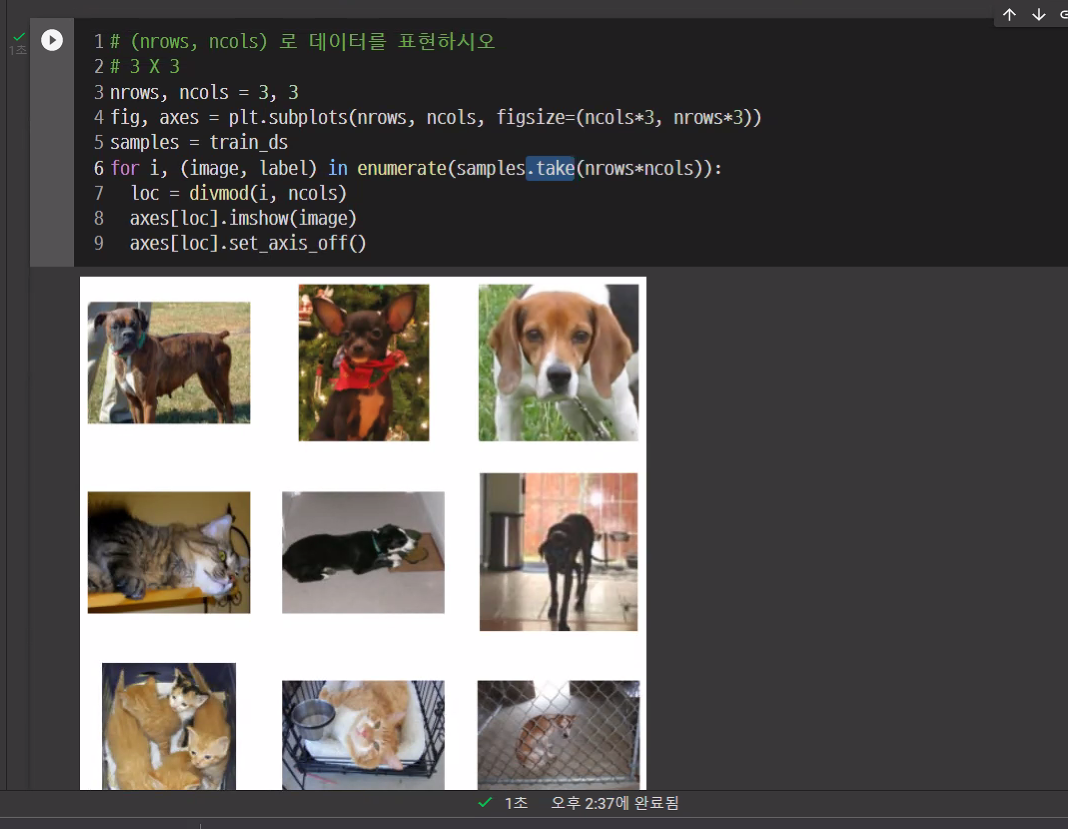

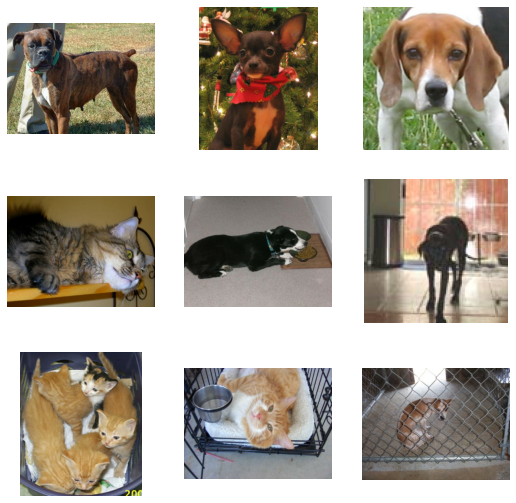

In [ ]:
#4. (nrows,ncols)로 데이터를 표현하시오
#3x3

nrows,ncols=3,3
fig, axes=plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*3))
samples=train_ds

for i, (image,label) in enumerate(samples.take(nrows*ncols)):
  loc = divmod(i, ncols)
  axes[loc].imshow(image)
  axes[loc].set_axis_off()

In [ ]:
#6. 데이터 증강 모델을 만드시오 
# tf.keras.layers.Random

for attr in dir (tf.keras.layers):
  if "Random" in attr:
    print(attr)
IMG_SIZE=100
my_model=tf.keras.Sequential([tf.keras.layers.Resizing(IMG_SIZE,IMG_SIZE),
                              tf.keras.layers.Rescaling(1./255),
                              tf.keras.layers.RandomFlip('horizontal_and_vertical'),
                              tf.keras.layers.RandomRotation(0.3)])

RandomContrast
RandomCrop
RandomFlip
RandomHeight
RandomRotation
RandomTranslation
RandomWidth
RandomZoom


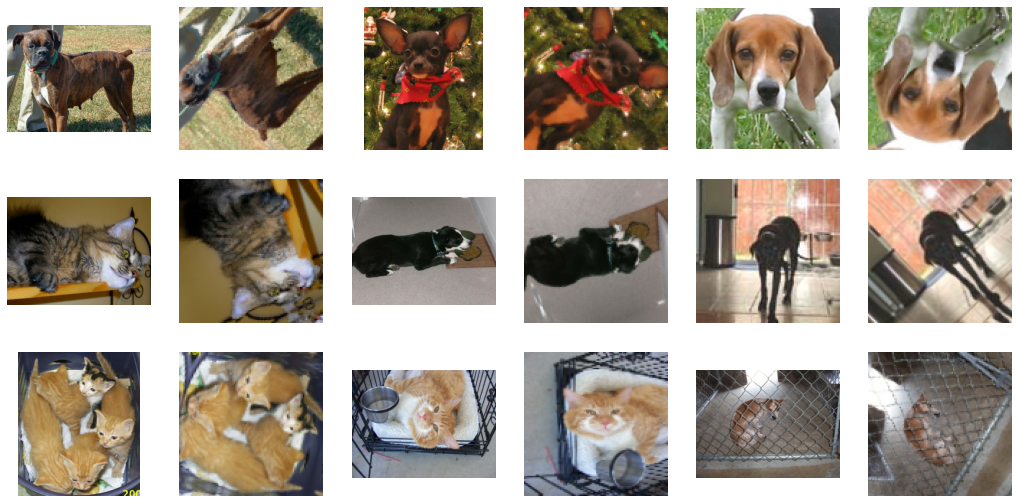

In [ ]:
#7. 데이터 전처리를 하시오
nrows,ncols=3,3
fig,axes=plt.subplots(nrows,ncols*2,figsize=(ncols*2*3,nrows*3))
for i, (image, label) in enumerate(train_ds.take(ncols*nrows)):
  r,c=divmod(i, ncols)
  processd= my_model(image)
  axes[r,2*c].imshow(image)
  axes[r,2*c].set_axis_off()
  axes[r,2*c+1].imshow(processd)
  axes[r,2*c+1].set_axis_off()
fig.show()


In [ ]:
@tf.function
def preprocess(image,lavel):
  return my_model(image),label

In [ ]:
train_ds1=train_ds.map(preprocess).cache().batch(10)
val_ds1=val_ds.map(preprocess).cache().batch(10)
test_ds1=test_ds.map(preprocess).cache().batch(10)

In [ ]:
#8. 모델 빌드 하기

def build_model():
  model =tf.keras.Sequential()
  model.add(tf.keras.Input(shape=(IMG_SIZE,IMG_SIZE,3)))
  model.add(tf.keras.layers.Conv2D(filters=32,
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   padding='valid',
                                   activation='relu'))
  model.add(tf.keras.layers.MaxPool2D((2,2),strides=2))
  model.add(tf.keras.layers.Conv2D(filters=64,
                                   kernel_size=3,
                                   strides=1,
                                   padding='valid',
                                   activation='relu'))
  model.add(tf.keras.layers.MaxPool2D((2,2),strides=2))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128,
                                  activation='relu'))
  model.add(tf.keras.layers.Dense(64,
                                  activation='relu'))
  model.add(tf.keras.layers.Dense(1,
                                  activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
my_model4=build_model()
my_model4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 33856)             0         
                                                                 
 dense_30 (Dense)            (None, 128)             

In [ ]:

cp= tf.keras.callbacks.ModelCheckpoint('drive/MyDrive/models/model-{epoch}-{val_loss:1.4f}.h5',monitor='val_loss',mode='min')

In [ ]:
my_history4= my_model4.fit(train_ds1,
                          validation_data=val_ds1,
                          epochs=20,
                          callbacks=[cp])

Epoch 1/20
1396/1396 [==============================] - 64s 46ms/step - loss: 1.5968e-17 - accuracy: 1.0000 - val_loss: 1.8461e-19 - val_accuracy: 1.0000
Epoch 2/20
1396/1396 [==============================] - 11s 8ms/step - loss: 1.5968e-17 - accuracy: 1.0000 - val_loss: 1.8461e-19 - val_accuracy: 1.0000
Epoch 3/20
1396/1396 [==============================] - 11s 8ms/step - loss: 1.5968e-17 - accuracy: 1.0000 - val_loss: 1.8461e-19 - val_accuracy: 1.0000
Epoch 4/20
1396/1396 [==============================] - 11s 8ms/step - loss: 1.5968e-17 - accuracy: 1.0000 - val_loss: 1.8461e-19 - val_accuracy: 1.0000
Epoch 5/20
1396/1396 [==============================] - 11s 8ms/step - loss: 1.5968e-17 - accuracy: 1.0000 - val_loss: 1.8461e-19 - val_accuracy: 1.0000
Epoch 6/20
1396/1396 [==============================] - 11s 8ms/step - loss: 1.5968e-17 - accuracy: 1.0000 - val_loss: 1.8461e-19 - val_accuracy: 1.0000
Epoch 7/20
1396/1396 [==============================] - 11s 8ms/step - loss: 1.59

In [ ]:
# 9. 손실과 정확도에 대한 그래프를 그리시오
def show_history(history):
  loss =history.history['loss']
  val_loss=history.history['val_loss']
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']

  epochs=len(loss)
  fig,axes=plt.subplots(1,2,figsize=(8,4))

  axes[0].plot(range(epochs), loss, label='loss')
  axes[0].plot(range(epochs), val_loss, label='val_loss')
  axes[0].legend(loc='upper right')

  axes[1].plot(range(epochs), acc, label='accuracy')
  axes[1].plot(range(epochs), val_acc, label='val_accuracy')
  axes[1].legend(loc='upper right')

  fig.show()

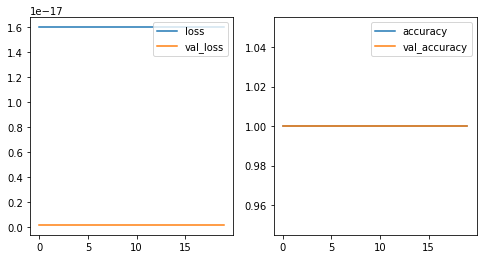

In [ ]:
show_history(my_history3)